In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the Camera Accessory data set
cam_access=pd.read_csv('CameraAccessory.csv')
cam_access.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [3]:
# Drop unnamed variable column
cam_access = cam_access.drop(['Unnamed: 0'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [4]:
# Drop lag, MA and GMV columns
cam_access = cam_access.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,-0.07
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,2.47
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.18
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,0.04
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,-0.51


In [6]:
#fill nan value with 0
cam_access['GMV_lag_1_per'] = cam_access['GMV_lag_1_per'].fillna(0)

In [7]:
#checking nan value
cam_access['GMV_lag_1_per'].isna().sum()

0

In [8]:
#Renaming column
cam_access.rename({' Affiliates':'Affiliates'},axis=1, inplace=True)

In [9]:
# Drop unwanted variable columns
cam_access = cam_access.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,"6,400.00",1,0,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,-0.07
1,"6,900.00",1,0,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,2.47
2,"1,990.00",1,0,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.18
3,"1,690.00",1,0,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,0.04
4,"1,618.00",1,0,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,-0.51


In [10]:
cam_access.dtypes

gmv                              float64
units                              int64
deliverybdays                      int64
deliverycdays                      int64
s1_fact_order_payment_type        object
sla                                int64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                      float64
product_procurement_sla            int64
wday                               int64
Pay_Day                            int64
is_holiday                         int64
special_sale                      object
Discount_Percentage              float64
gmvperunit                       float64
delivery_on_time                 float64
delivery_status                   object
Total Investment                 float64
TV                               float64
Digital                          float64
Sponsorship                      float64
Content Marketing                float64
Online marketing

In [11]:
#Check size
cam_access.shape

(196350, 43)

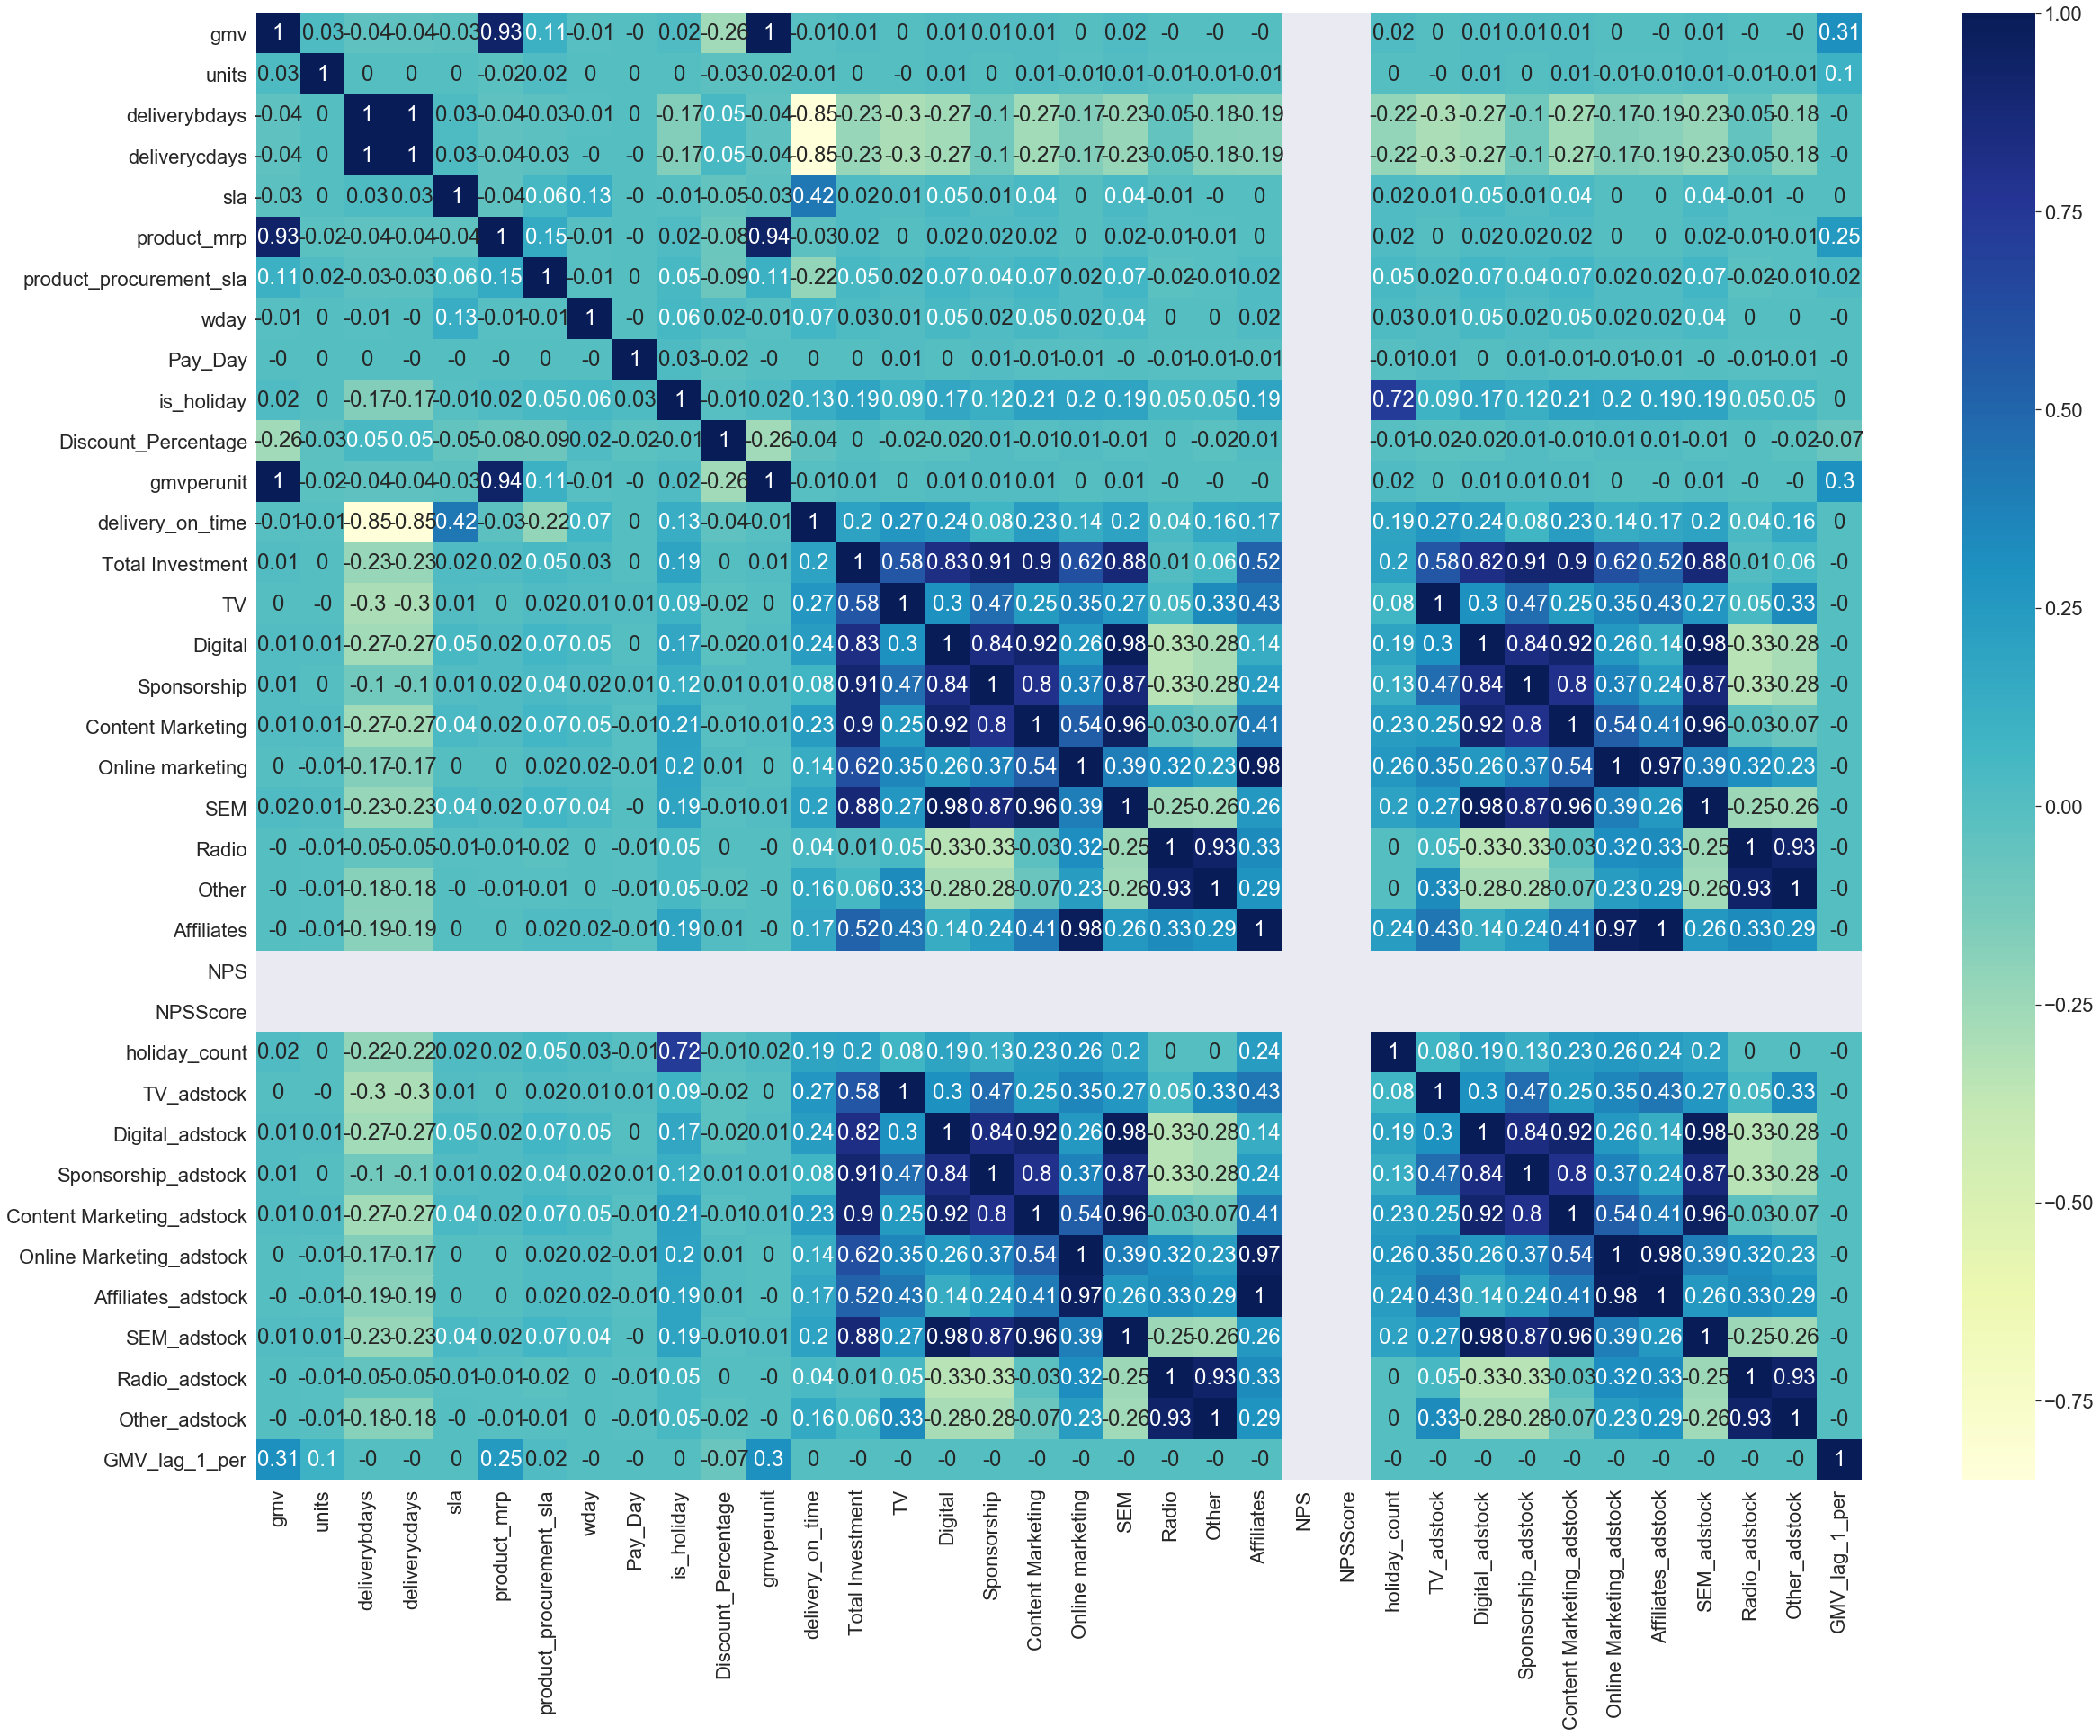

In [12]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(cam_access.corr(), 2), annot=True, cmap="YlGnBu");

In [13]:
#Drop Multicolinear variables
cam_access = cam_access.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online Marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)                             
cam_access.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"6,400.00",1,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.07
1,"6,900.00",1,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,Luxury,2.47
2,"1,990.00",1,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,MassMarket,0.18
3,"1,690.00",1,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,MassMarket,0.04
4,"1,618.00",1,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,MassMarket,-0.51


In [14]:
#Listing columns
cam_access.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', 'Affiliates', 'NPS', 'NPSScore',
       'holiday_count', 'ItemType', 'GMV_lag_1_per'],
      dtype='object')

In [15]:
#looking for Nan values
cam_access.isnull().sum()

gmv                                   0
units                                 0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
wday                                  0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0
Radio                                 0


In [16]:
cam_access['NPS'] = cam_access['NPS'].fillna(0)
cam_access['NPSScore'] = cam_access['NPSScore'].fillna(0)

In [17]:
#looking for Nan values
cam_access.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
Affiliates                       0
NPS                              0
NPSScore            

In [18]:
#Checking unique values in delivery time variable 
cam_access['delivery_on_time'].unique()

array([   5.,    7.,    1.,    3.,    0.,    2.,    4.,    9.,    6.,
          8.,   10.,   -1.,   -2.,   -4.,   -3.,   12.,   11.,   -5.,
         -9.,   -7.,   -6.,   -8.,   17.,  -10.,   13.,   18.,   16.,
         14.,   19.,  -15.,   15.,   20.,  -14.,  -17.,  -11.,  -13.,
         21.,  -18.,   24.,   22.,   25.,   37.,   23.,   32.,   26.,
         27.,   35.,   31.,  -12.,  -25.,  -16.,  -23.,  -19.,  -22.,
        -21.,  -24.,  -26.,  -20.,  -38.,  -36., -109.,  -37.,  -29.,
        -40.,  -31.,  -28.,  -27.,  -34.,  -39.,   39.,   34.,  -32.,
        -33.,  -43.,  -30., -136.])

In [19]:
cam_access=cam_access.loc[(cam_access['delivery_on_time']>0)]
cam_access.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"6,400.00",1,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,-0.07
1,"6,900.00",1,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,2.47
2,"1,990.00",1,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,MassMarket,0.18
3,"1,690.00",1,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,MassMarket,0.04
4,"1,618.00",1,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,MassMarket,-0.51


In [20]:
#Checking detail columns
cam_access.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gmv                            122702 non-null  float64
 1   units                          122702 non-null  int64  
 2   deliverycdays                  122702 non-null  int64  
 3   s1_fact_order_payment_type     122702 non-null  object 
 4   sla                            122702 non-null  int64  
 5   product_analytic_category      122702 non-null  object 
 6   product_analytic_sub_category  122702 non-null  object 
 7   product_analytic_vertical      122702 non-null  object 
 8   product_mrp                    122702 non-null  float64
 9   product_procurement_sla        122702 non-null  int64  
 10  wday                           122702 non-null  int64  
 11  Pay_Day                        122702 non-null  int64  
 12  is_holiday                    

In [21]:
# Subset all categorical variables
ecart_CA_numerical = cam_access.select_dtypes(include=['int64','float64'])
ecart_CA_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,GMV_lag_1_per
0,"6,400.00",1,0,5,"7,190.00",0,5,0,1,10.99,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.07
1,"6,900.00",1,0,7,"7,190.00",0,0,0,0,4.03,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,2.47
2,"1,990.00",1,0,10,"2,099.00",3,1,0,0,5.19,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.18
3,"1,690.00",1,0,4,"2,099.00",3,2,0,0,19.49,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.04
4,"1,618.00",1,0,6,"2,099.00",3,5,0,1,22.92,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.51


In [22]:
#Checking detail columns
ecart_CA_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gmv                      122702 non-null  float64
 1   units                    122702 non-null  int64  
 2   deliverycdays            122702 non-null  int64  
 3   sla                      122702 non-null  int64  
 4   product_mrp              122702 non-null  float64
 5   product_procurement_sla  122702 non-null  int64  
 6   wday                     122702 non-null  int64  
 7   Pay_Day                  122702 non-null  int64  
 8   is_holiday               122702 non-null  int64  
 9   Discount_Percentage      122702 non-null  float64
 10  delivery_on_time         122702 non-null  float64
 11  Total Investment         122702 non-null  float64
 12  TV                       122702 non-null  float64
 13  Digital                  122702 non-null  float64
 14  Spon

In [23]:
# Subset all categorical variables
ecart_CA_categorical = cam_access.select_dtypes(include=['object'])
ecart_CA_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,Luxury
1,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,Luxury
2,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
3,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
4,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,MassMarket


In [24]:
#convert into dummies
ecart_CA_dummies = pd.get_dummies(ecart_CA_categorical, drop_first=True)
ecart_CA_dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraHousing,product_analytic_vertical_CameraMicrophone,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
# Drop categorical variable columns
cam_access = cam_access.drop(list(ecart_CA_categorical.columns), axis=1)

In [26]:
#checking dataframe now
cam_access.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,GMV_lag_1_per
0,"6,400.00",1,0,5,"7,190.00",0,5,0,1,10.99,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.07
1,"6,900.00",1,0,7,"7,190.00",0,0,0,0,4.03,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,2.47
2,"1,990.00",1,0,10,"2,099.00",3,1,0,0,5.19,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.18
3,"1,690.00",1,0,4,"2,099.00",3,2,0,0,19.49,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.04
4,"1,618.00",1,0,6,"2,099.00",3,5,0,1,22.92,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.51


In [27]:
# Concatenate dummy variables with X
ecart_CA = pd.concat([cam_access, ecart_CA_dummies], axis=1)
ecart_CA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"6,400.00",1,0,5,"7,190.00",0,5,0,1,10.99,...,1,0,0,0,0,0,0,0,0,0
1,"6,900.00",1,0,7,"7,190.00",0,0,0,0,4.03,...,0,0,0,0,0,0,1,0,0,0
2,"1,990.00",1,0,10,"2,099.00",3,1,0,0,5.19,...,0,0,0,0,0,0,1,0,0,1
3,"1,690.00",1,0,4,"2,099.00",3,2,0,0,19.49,...,0,0,0,0,0,0,1,0,0,1
4,"1,618.00",1,0,6,"2,099.00",3,5,0,1,22.92,...,1,0,0,0,0,0,0,0,0,1


In [29]:
#Checking size
ecart_CA.shape

(122702, 60)

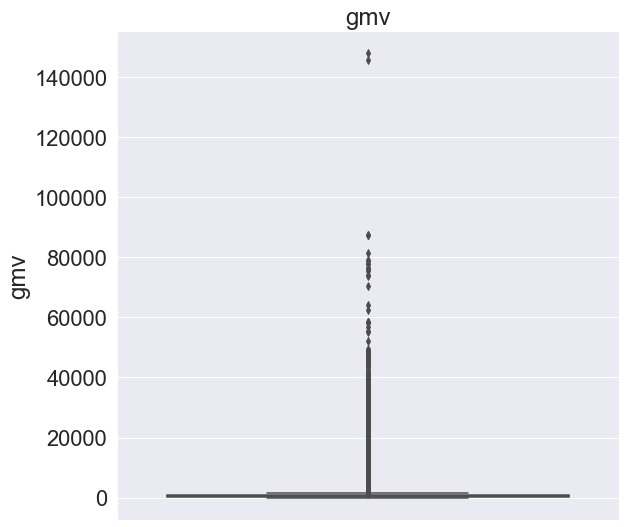

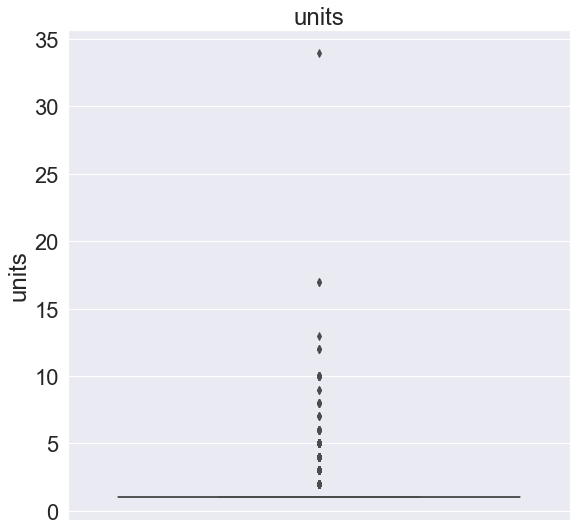

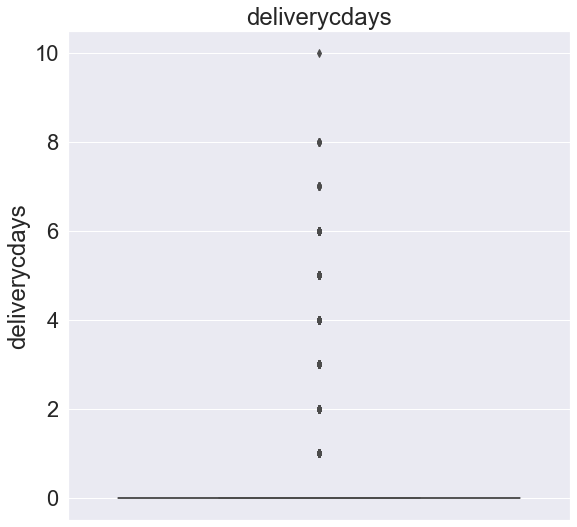

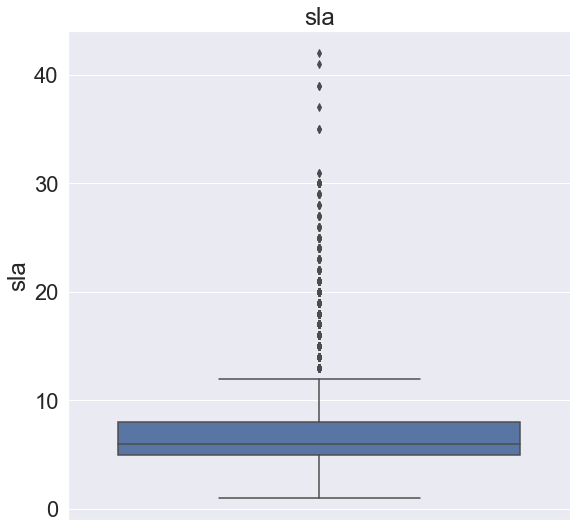

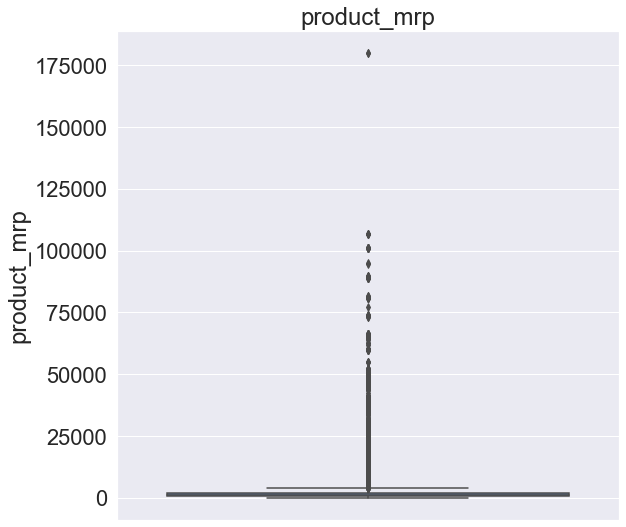

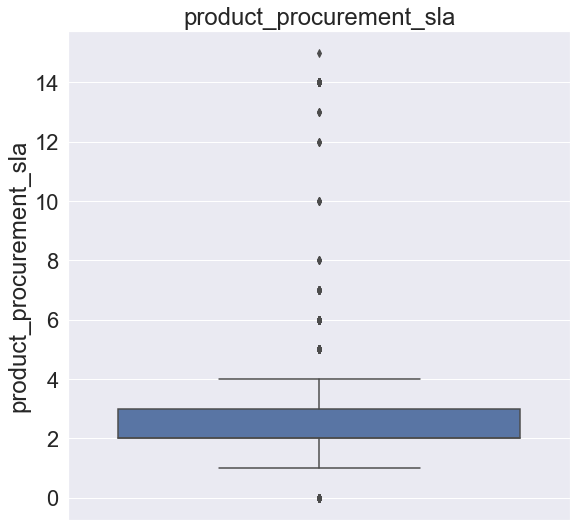

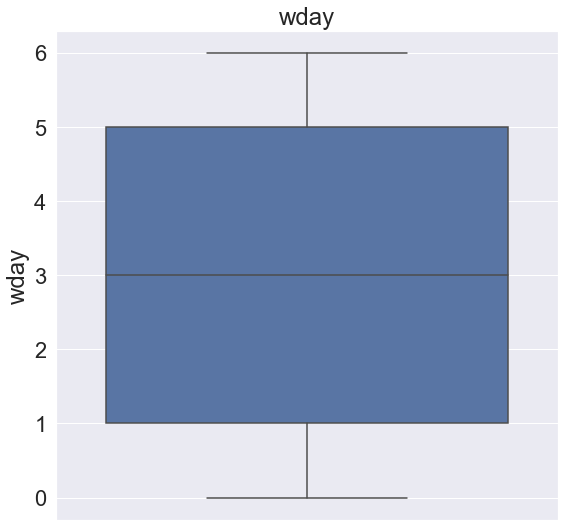

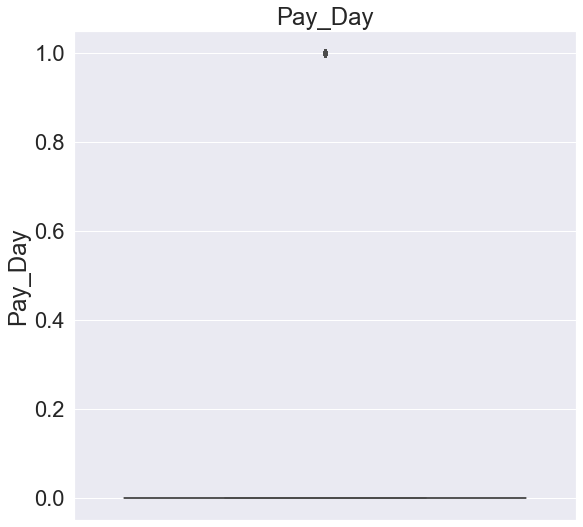

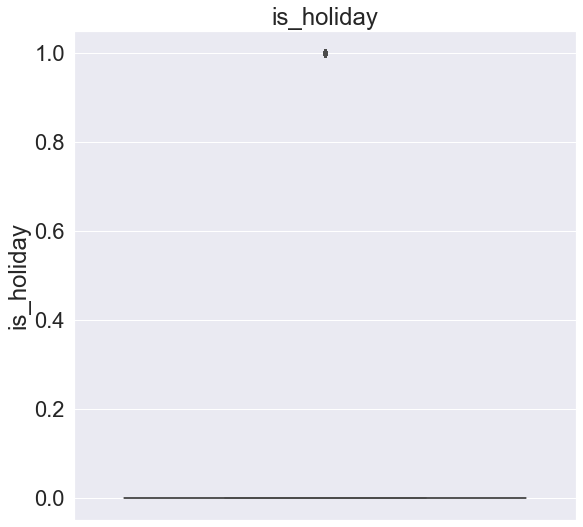

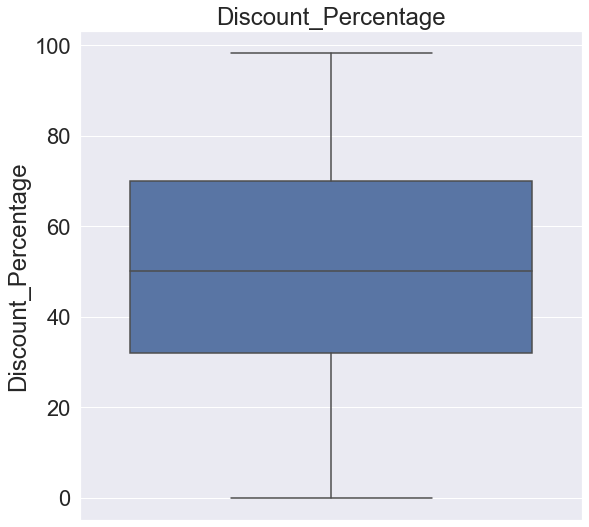

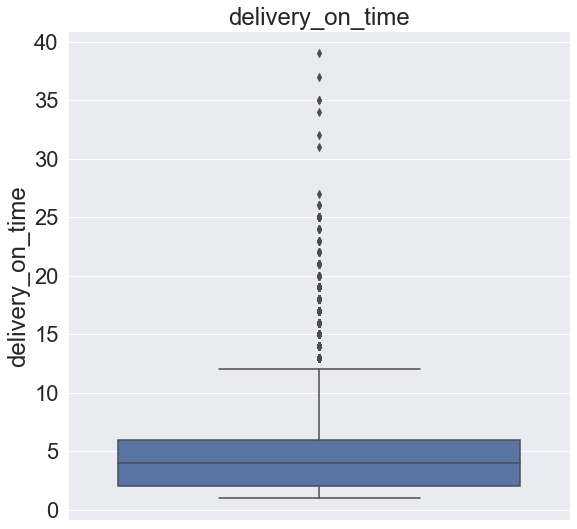

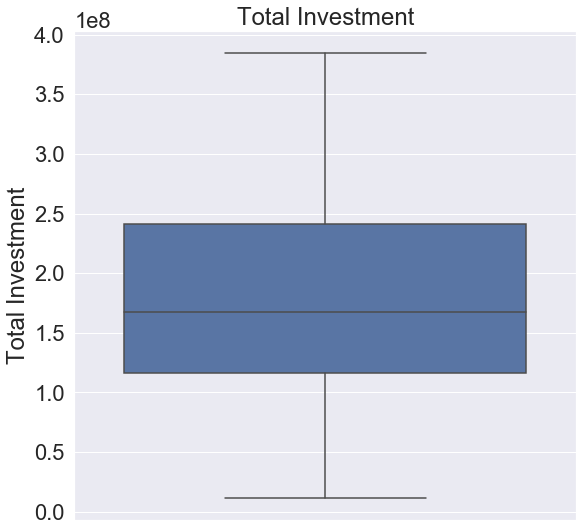

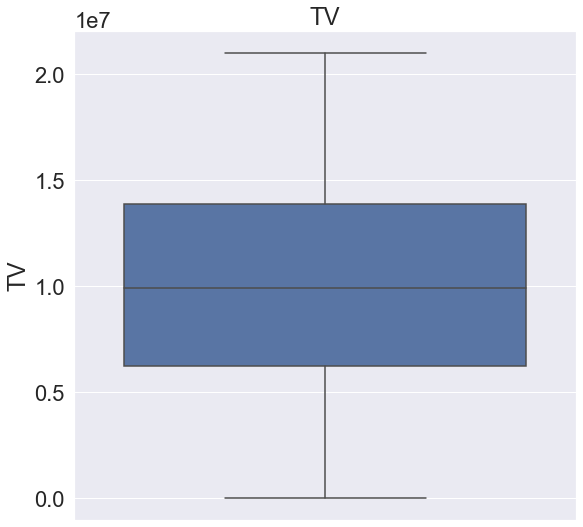

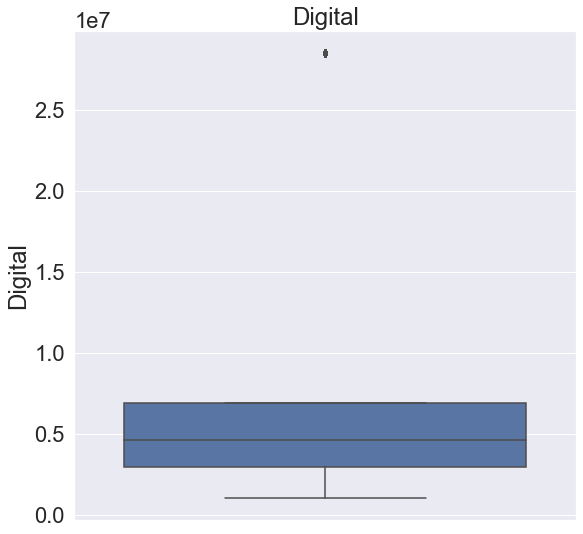

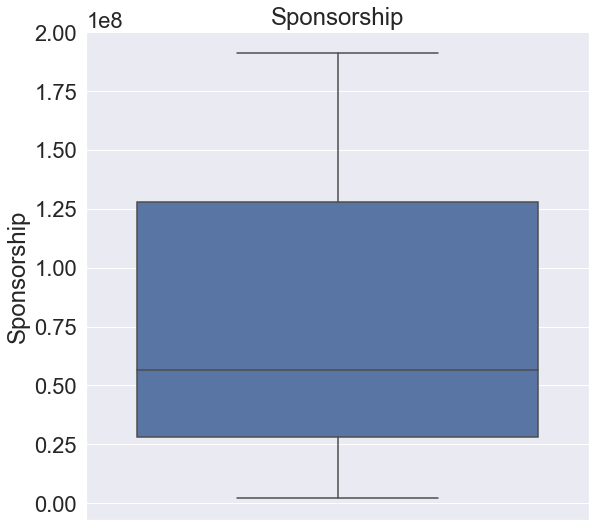

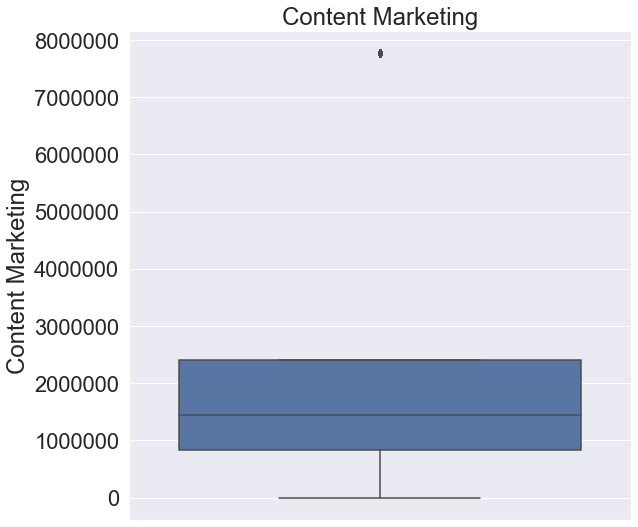

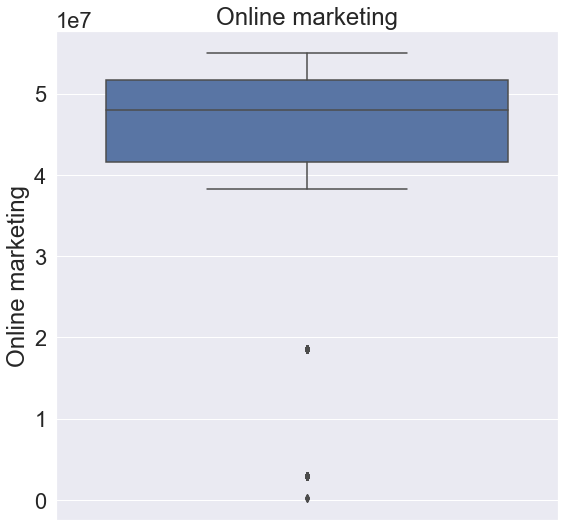

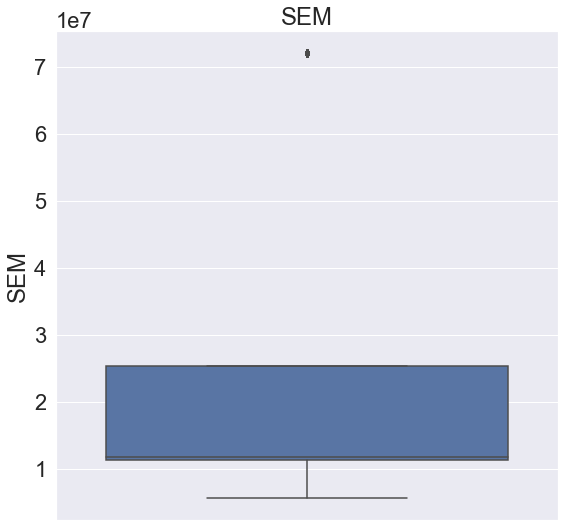

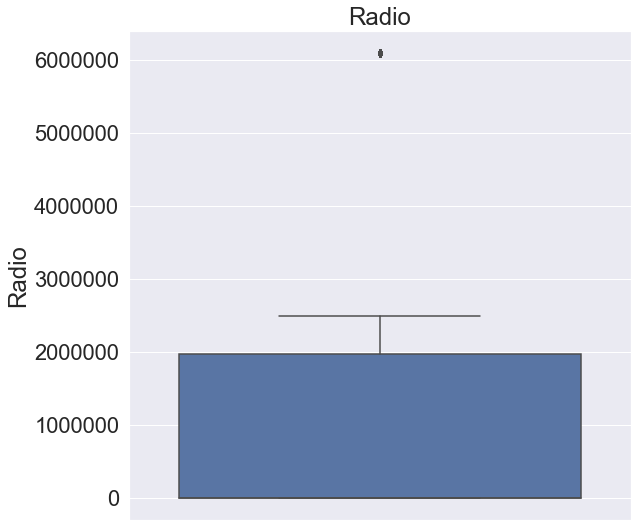

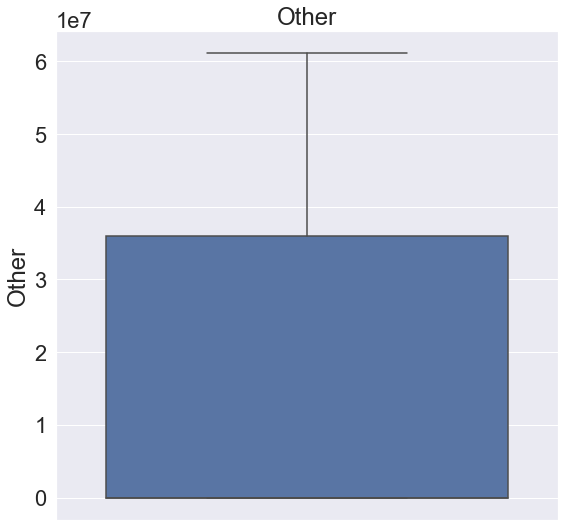

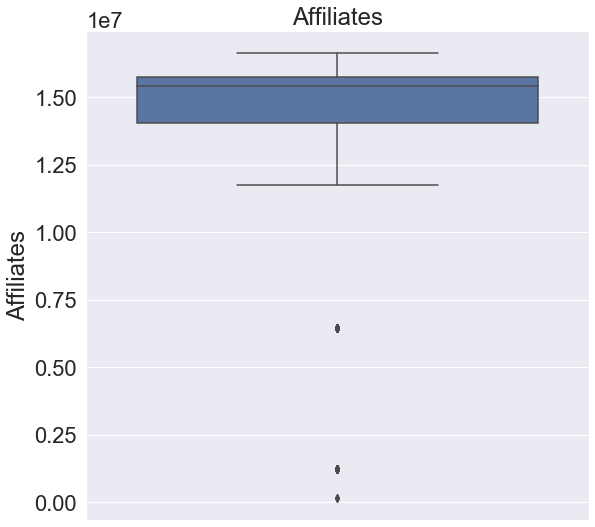

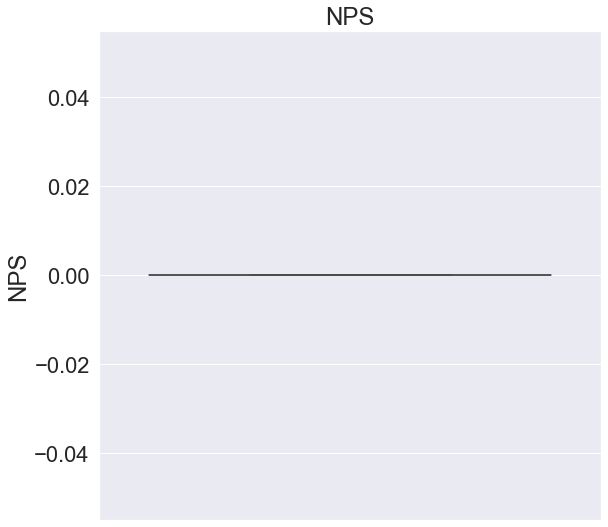

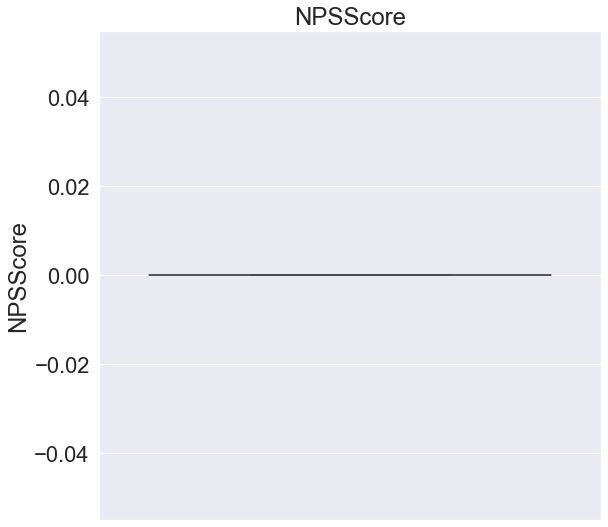

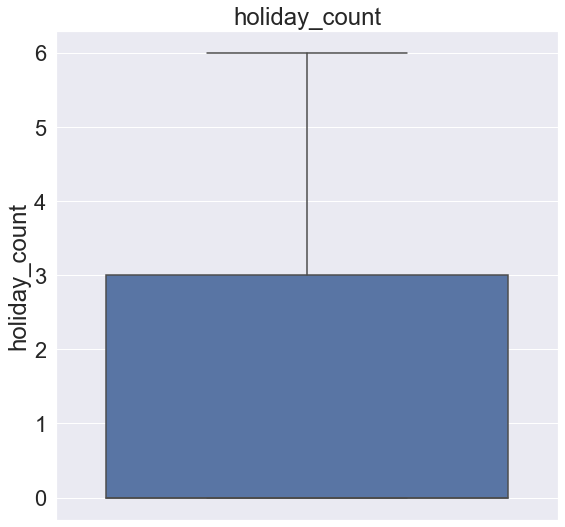

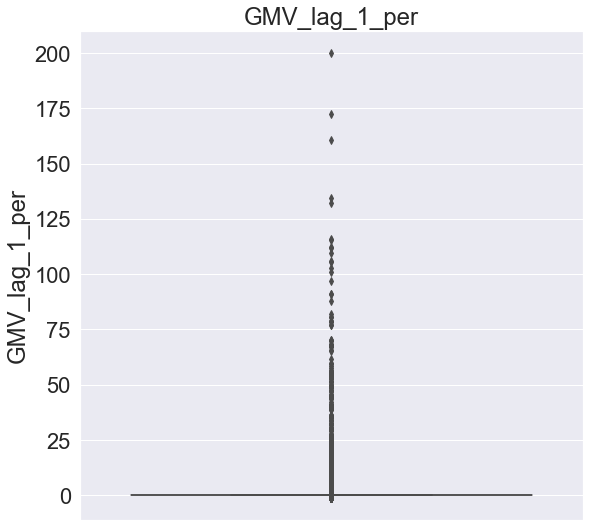

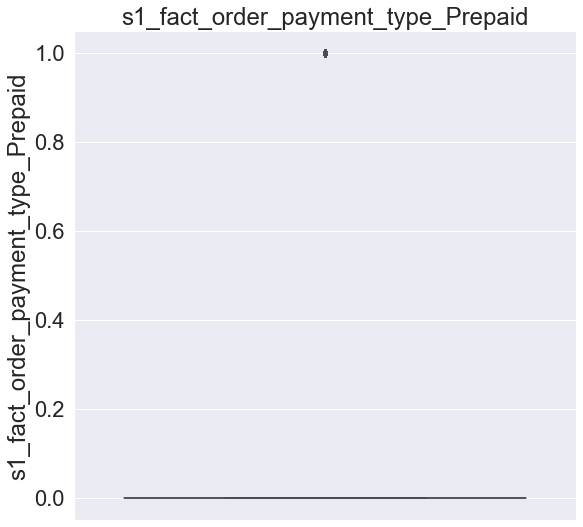

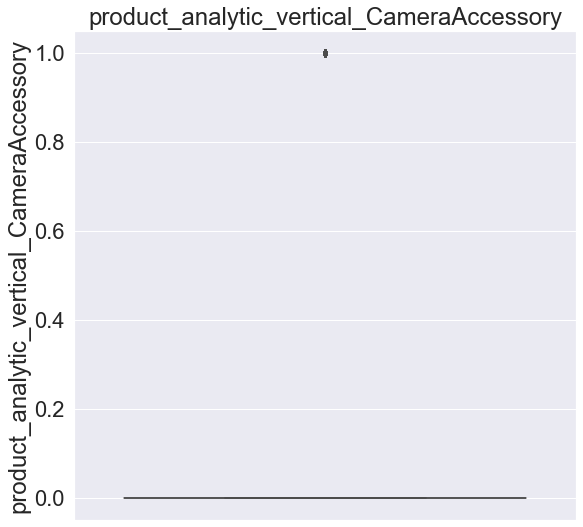

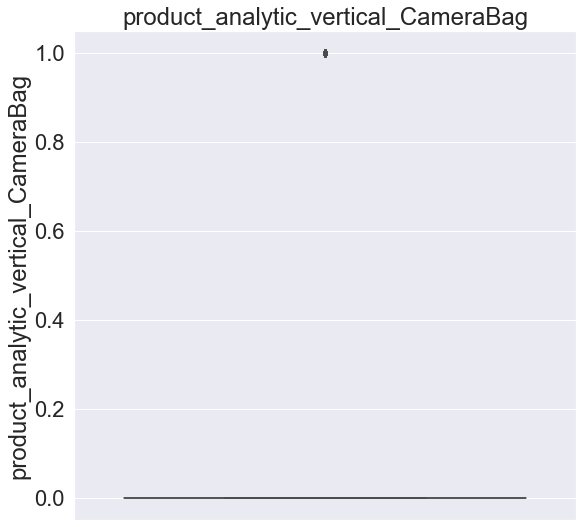

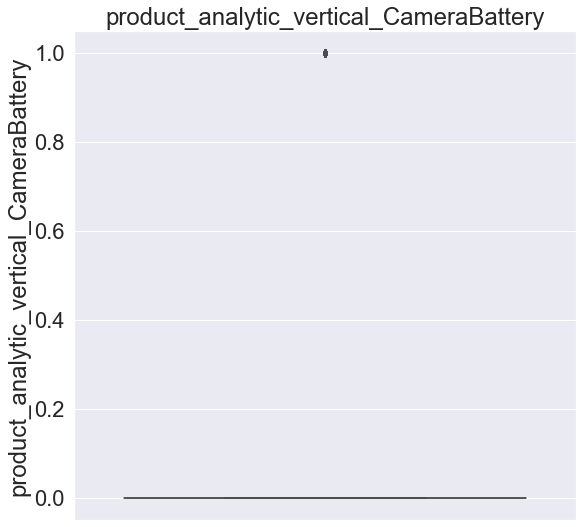

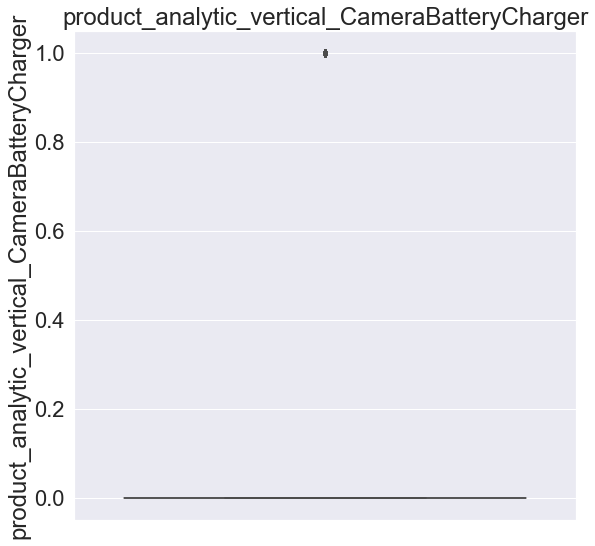

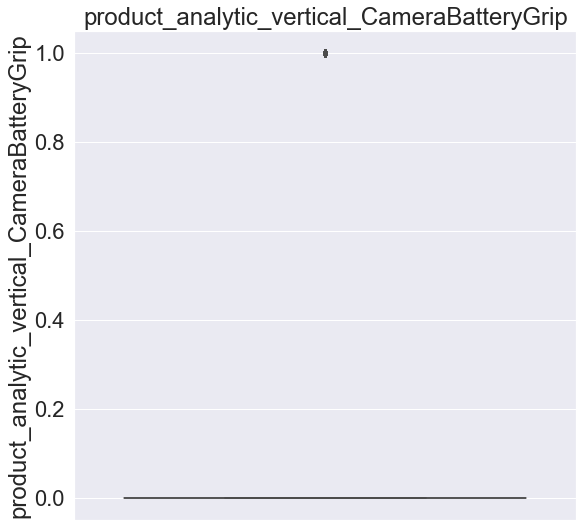

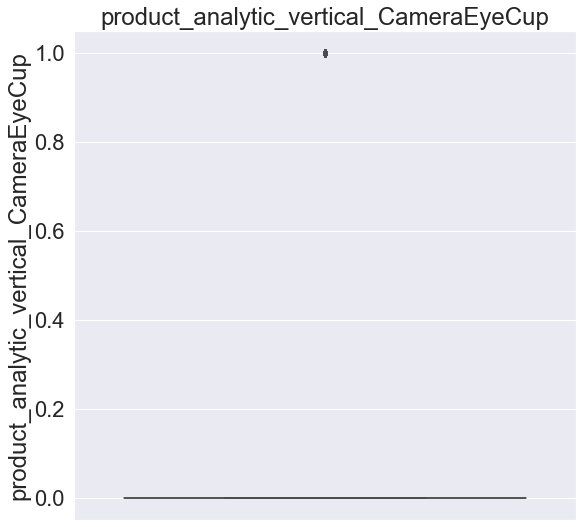

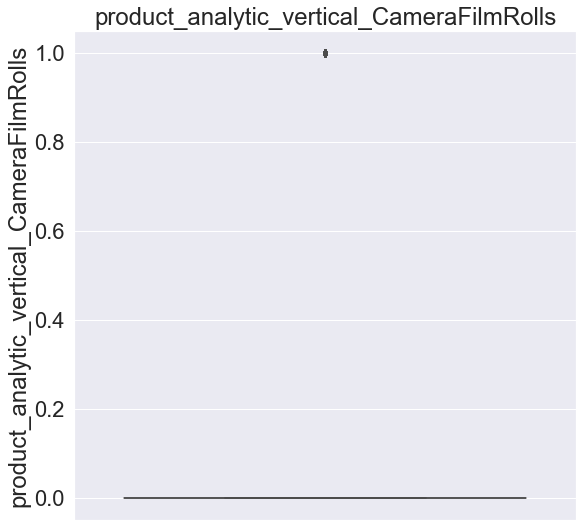

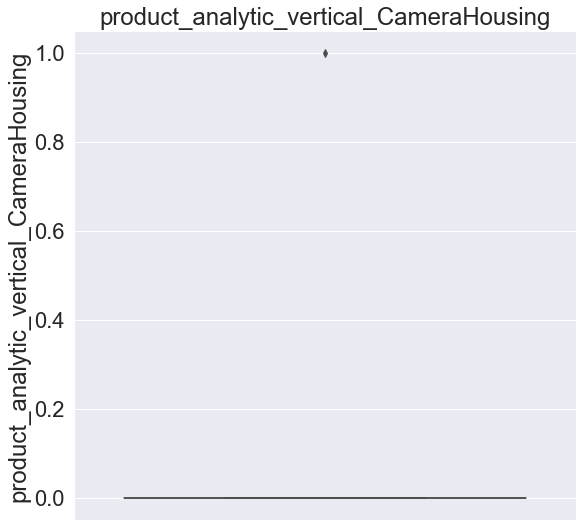

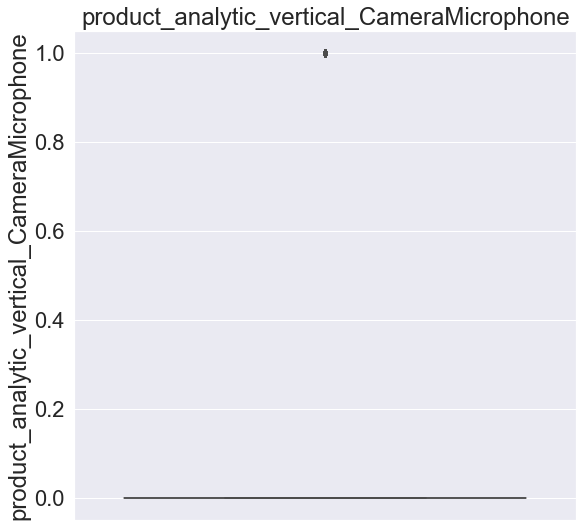

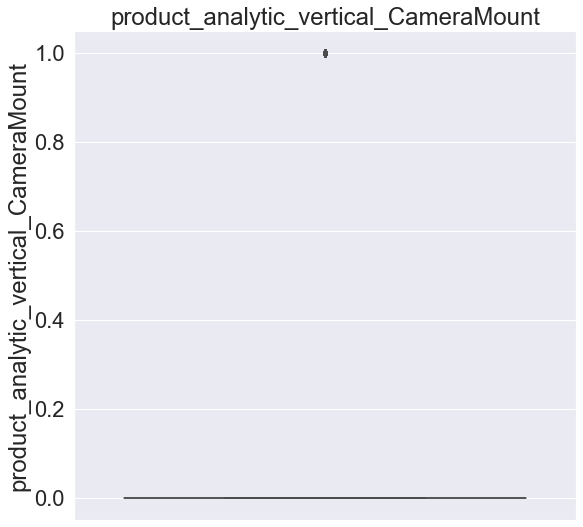

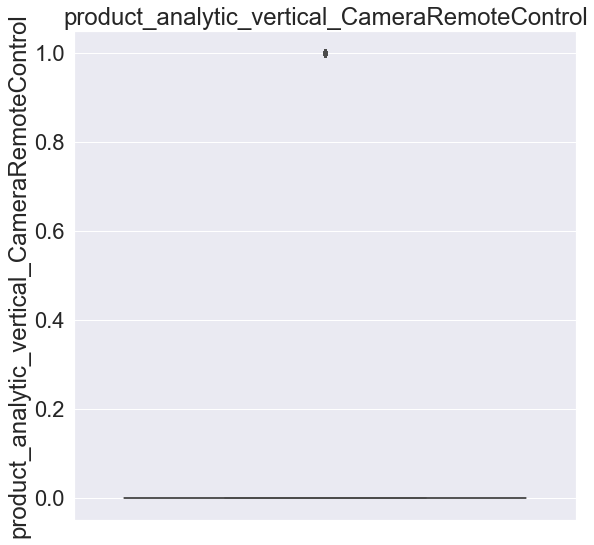

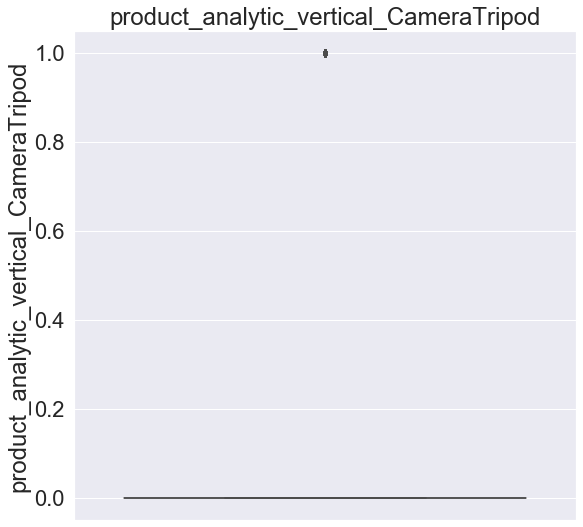

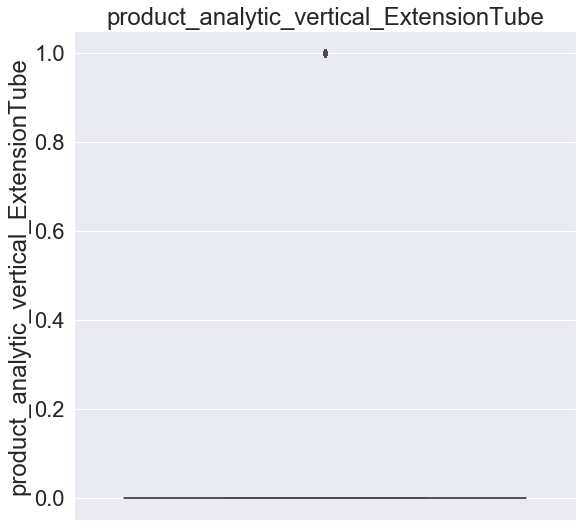

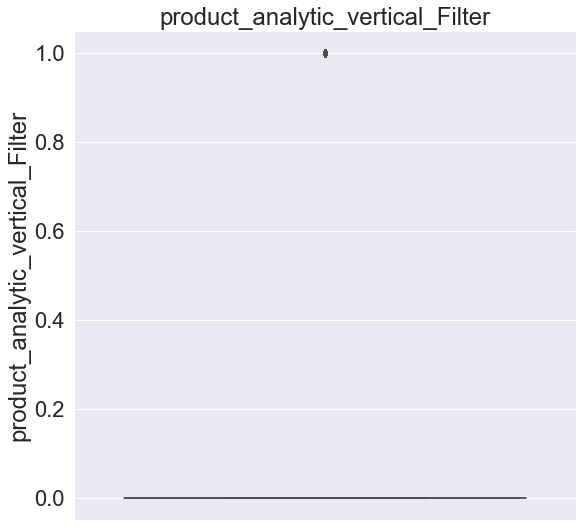

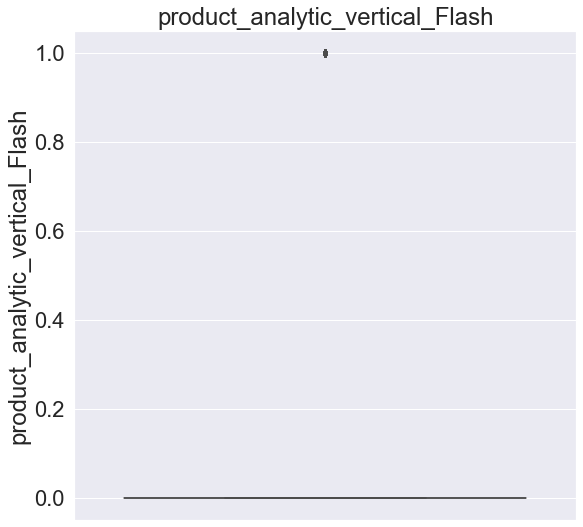

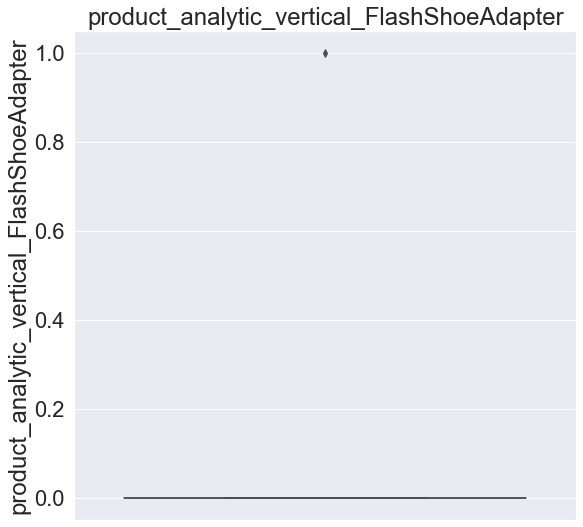

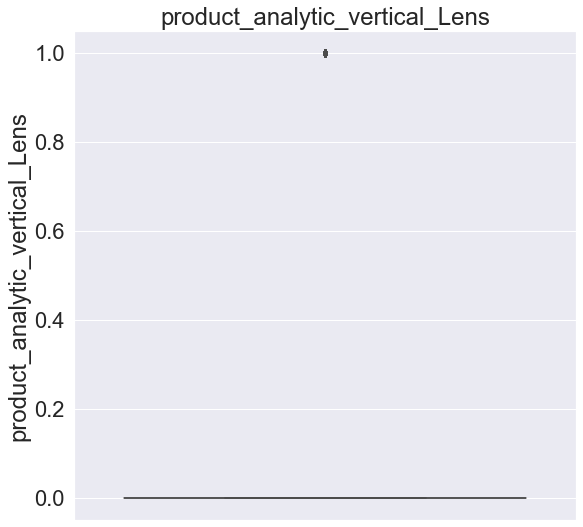

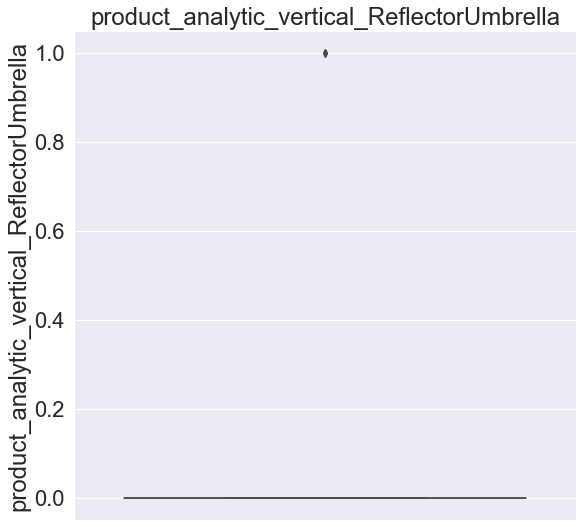

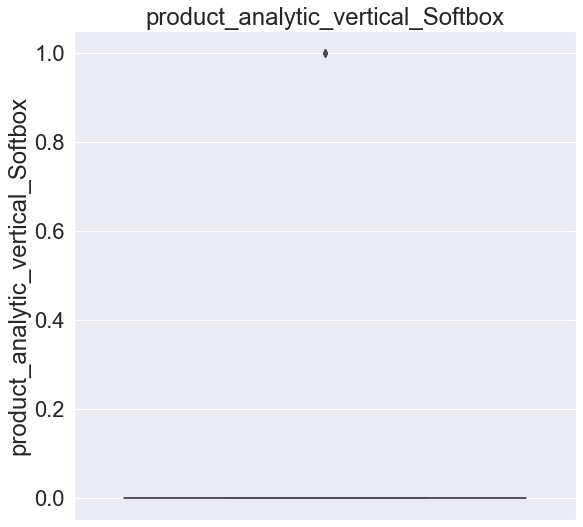

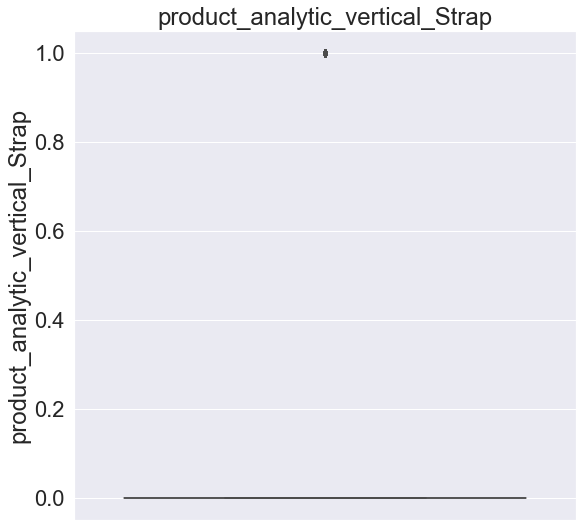

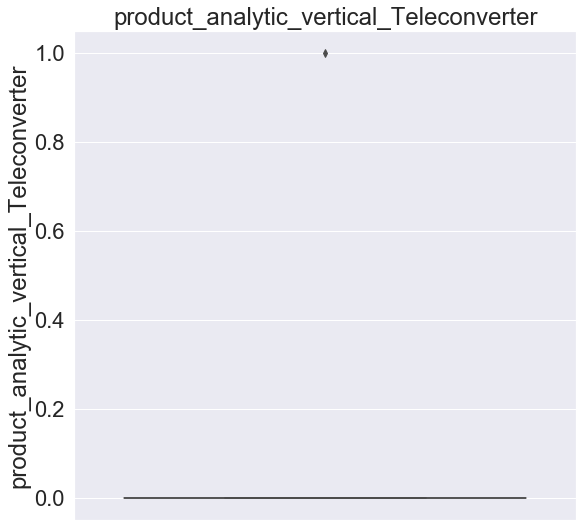

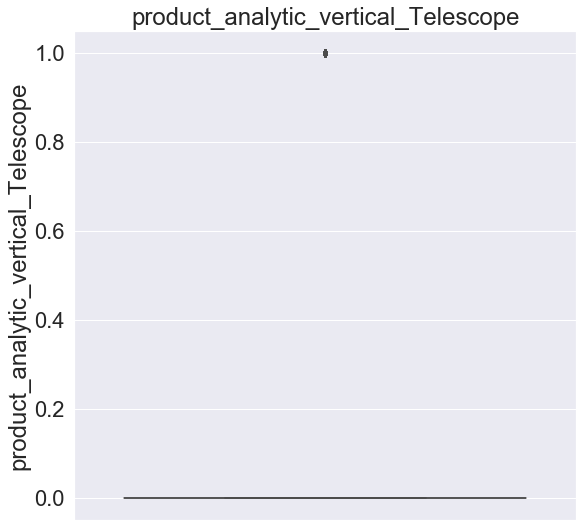

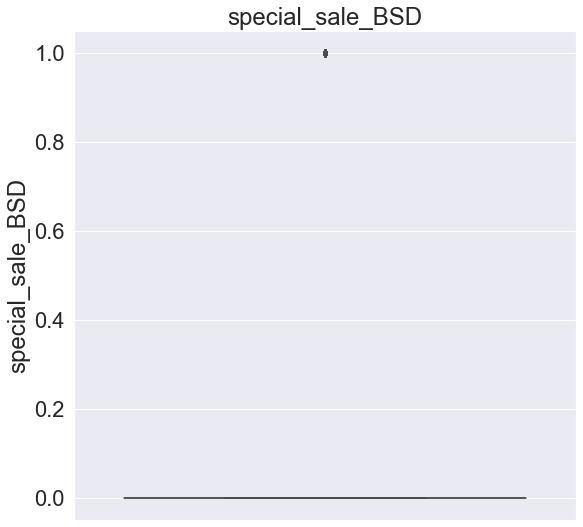

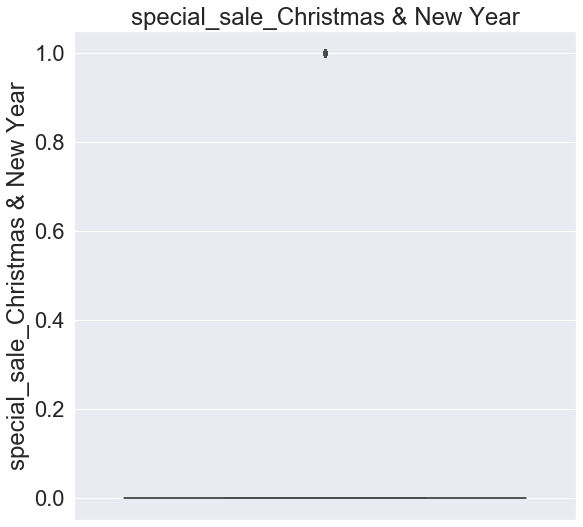

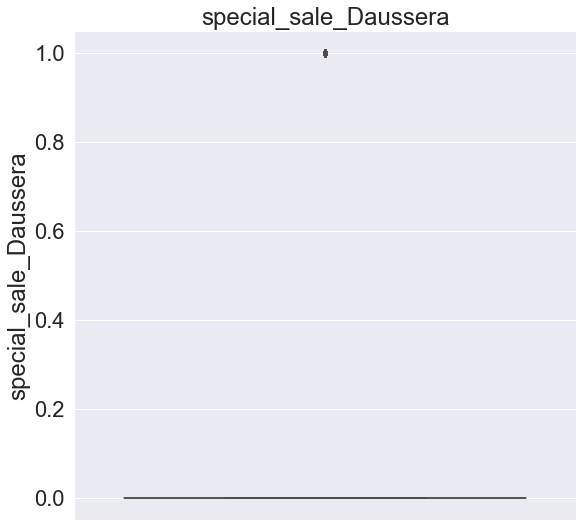

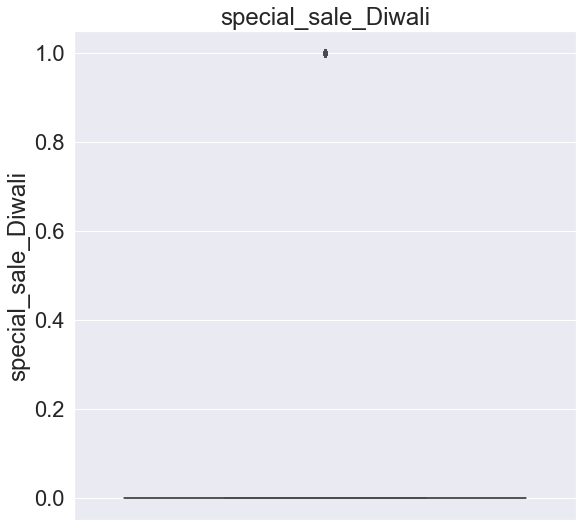

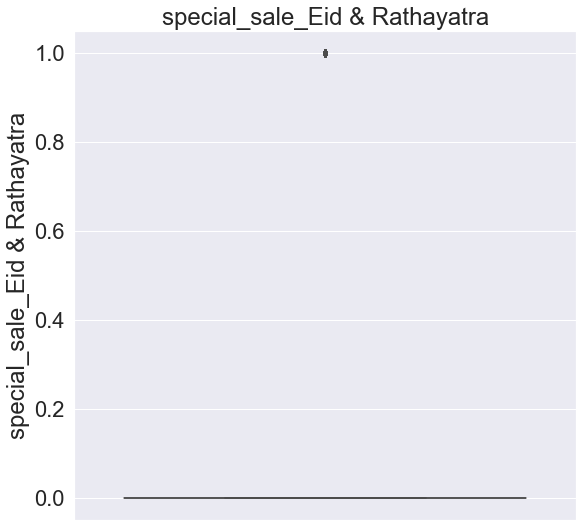

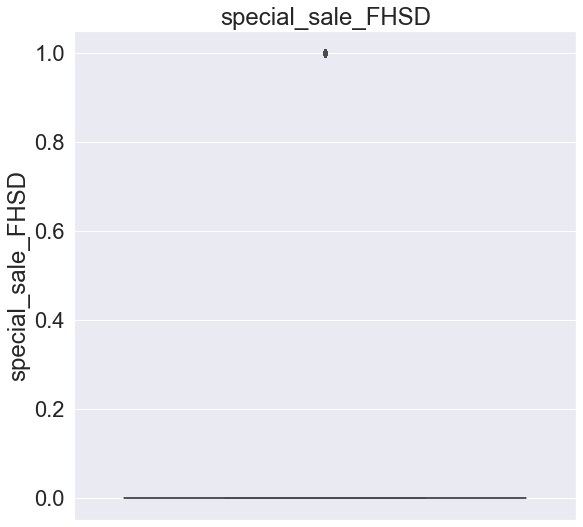

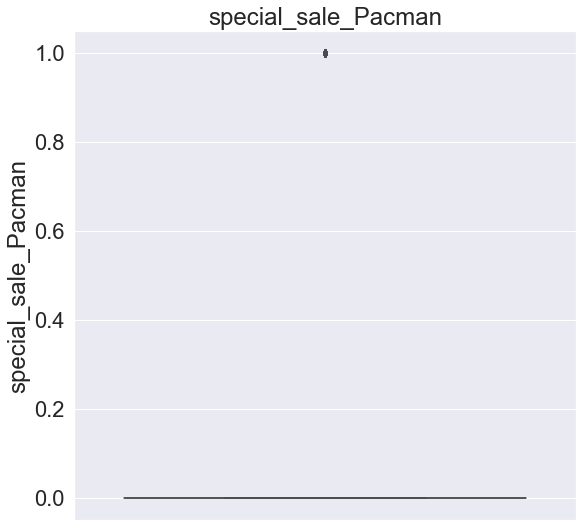

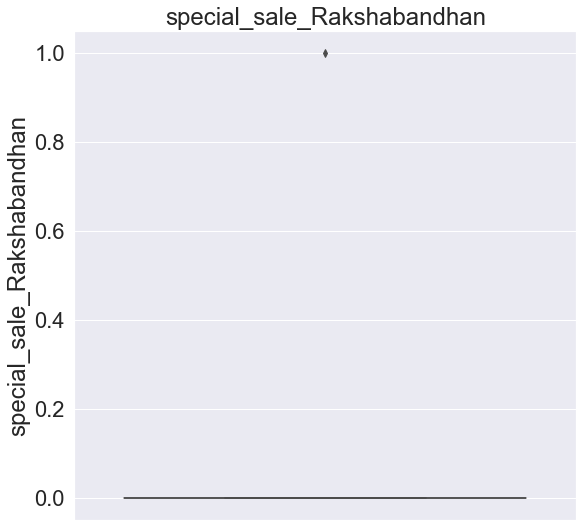

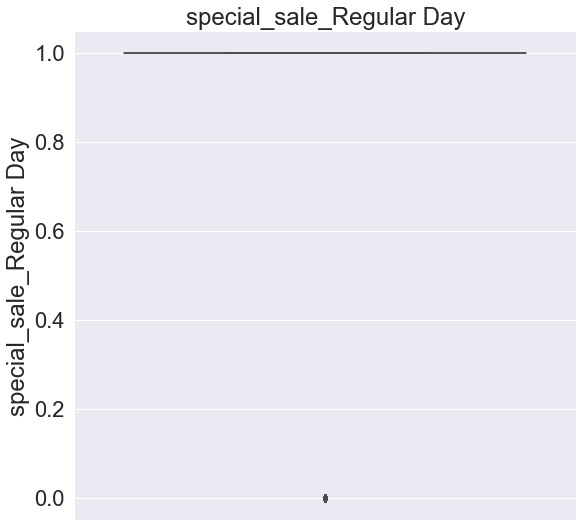

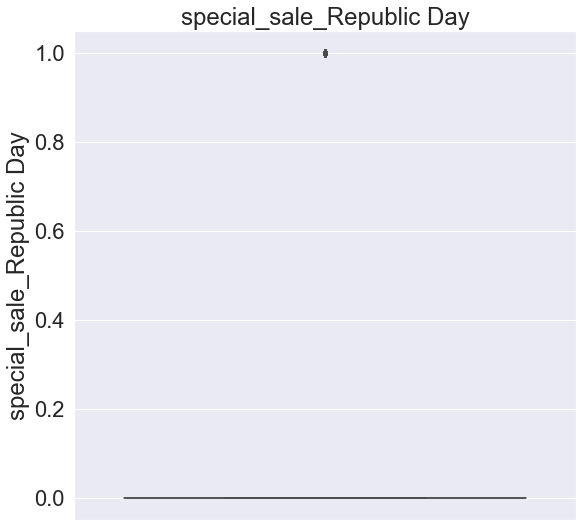

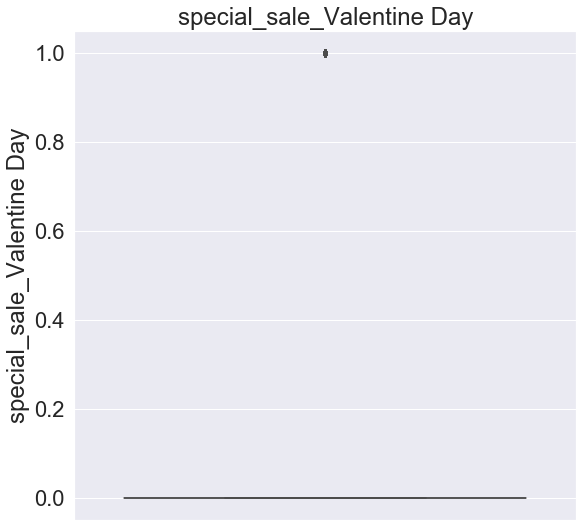

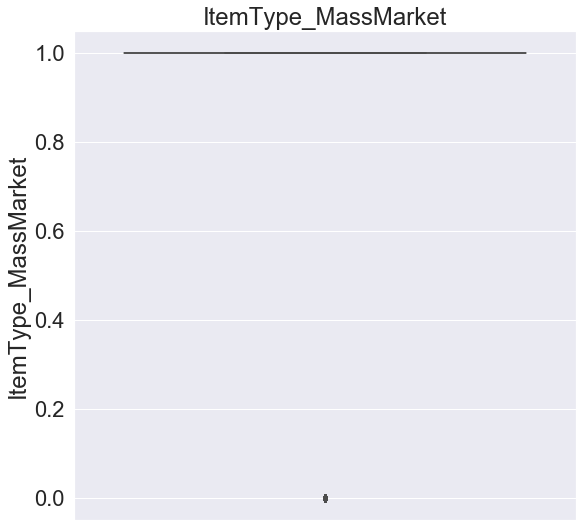

In [30]:
#Checking outliers in dataframe
for col in list(ecart_CA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ecart_CA, y=col).set_title(col)

In [31]:
#function for outlier treatment
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [32]:
#outlier df
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [33]:
#removing outliers
for col in outlier_cols:
        remove_outlier(ecart_CA, col)

In [34]:
#checking size
ecart_CA.shape

(122702, 60)

In [35]:
# Import the required library
from sklearn.model_selection import train_test_split

In [36]:
#train-test split 
df_train, df_test = train_test_split(ecart_CA, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(ecart_CA_dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ecart_CA.columns:
    if col not in dum_cols:
        varlist.append(col)

In [40]:
varlist

['gmv',
 'units',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'wday',
 'Discount_Percentage',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'NPSScore',
 'holiday_count',
 'GMV_lag_1_per']

In [41]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [42]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
4535,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0,0,0.00,...,0,0,0,0,0,0,1,0,0,1
142007,0.05,0.00,0.30,0.15,0.06,0.07,0.67,0,0,0.27,...,0,0,0,0,0,0,1,0,0,0
44919,0.00,0.00,0.00,0.12,0.00,0.07,0.33,0,0,0.40,...,0,0,0,0,0,0,1,0,0,1
74571,0.00,0.00,0.00,0.07,0.00,0.13,0.33,0,0,0.19,...,0,0,0,0,0,0,1,0,0,1
19352,0.00,0.00,0.00,0.10,0.00,0.20,0.83,0,1,0.59,...,1,0,0,0,0,0,0,0,0,1


In [43]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [45]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.10468549e-01  2.82706118e-03 -4.91549739e-03  7.92564347e-01
 -2.05709987e-03  2.13279912e-07 -5.66920017e-05 -2.05598918e-04
 -1.80633884e-02  5.19415261e-03  1.14304841e+00 -5.39908847e-02
 -7.02266560e-02 -5.81456098e-01 -1.69924481e-02 -1.53364966e-01
 -2.27079227e-01 -7.32135698e-04 -2.07168437e-01 -6.75480089e-02
 -6.74252064e+09  8.39951967e+09  7.33307338e-05  7.82860177e-02
 -3.38705136e-04 -2.11371891e-03  1.08503910e-03 -2.02491088e-03
 -9.69576184e-04 -8.51950771e-04 -1.32449717e-03 -2.63570527e-03
  2.65676119e+07 -2.88089597e-03 -1.14460137e-03  1.51104976e-03
  1.73768410e-03 -3.62665692e-03  1.40512434e-03  2.63525408e-03
 -5.71497585e-04  9.83927767e-04  1.45349493e-03 -6.87910331e-04
 -1.11468981e-03 -4.62421527e+06 -2.61617020e-03 -5.38983674e-04
 -4.62021267e-04  6.86272112e-04 -2.35069501e-04  3.90687420e-05
 -3.72543642e-04 -1.62191690e-05 -3.39368701e-03 -3.50886705e-04
 -1.21166289e-04 -2.99832457e-04 -1.68257438e-03]
0.014726241312169352


In [47]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False  True False False False False False False  True  True
  True  True  True  True  True False  True  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[ 1 14 12  1  3 48 41 36  2 13  1  1  1  1  1  1  1 37  1  1 42 44 40  1
 31 20  9 21 25 27 22 19 43 17 23  6  7 15  8  4 29 11  5 28 24 46 18 30
 32 26 38 45 33 47 10 35 39 34 16]


In [48]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Other,Affiliates,GMV_lag_1_per
4535,1.00,0.00,0.01,1.00,0.66,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0.01
142007,1.00,0.00,0.06,0.44,0.15,0.03,0.37,0.23,0.97,0.15,0.18,0.92,0.01
44919,1.00,0.00,0.00,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.93,0.00
74571,1.00,0.00,0.00,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,0.01
19352,1.00,0.00,0.00,1.00,0.66,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0.01


In [49]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 5.221e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:47:42   Log-Likelihood:             3.0298e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85878   BIC:                        -6.058e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0044      0.00

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Total Investment,"1,523,087.71"
6,Sponsorship,"611,957.34"
10,Other,"98,094.87"
9,SEM,"88,222.86"
8,Online marketing,"21,852.07"
5,Digital,"10,512.84"
11,Affiliates,"6,469.07"
4,TV,"3,086.22"
0,const,930.76
7,Content Marketing,821.80


In [52]:
# drop 1st variable with high vif
X_train_rfe1.drop('Total Investment', axis = 1, inplace = True)

In [53]:
# Refitting with 11 variables
X_train_rfe2 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 5.694e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:48:53   Log-Likelihood:             3.0296e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85879   BIC:                        -6.058e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0011      0.00

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Affiliates,862.92
7,Online marketing,819.96
6,Content Marketing,510.65
4,Digital,394.49
0,const,207.85
8,SEM,155.20
5,Sponsorship,153.68
3,TV,118.50
9,Other,57.22
11,GMV_lag_1_per,1.08


In [55]:
# drop 2nd variable with high vif and p-value
X_train_rfe2.drop('Online marketing', axis = 1, inplace = True)

In [56]:
# Refitting with 10 variables
X_train_rfe3 = sm.add_constant(X_train_rfe2)

# Fitting the model with 10 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 6.264e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:50:41   Log-Likelihood:             3.0296e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85880   BIC:                        -6.058e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0012      0.00

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Content Marketing,505.51
4,Digital,391.99
0,const,175.98
7,SEM,155.16
3,TV,65.80
5,Sponsorship,62.88
8,Other,44.69
9,Affiliates,37.95
10,GMV_lag_1_per,1.08
2,product_mrp,1.07


In [58]:
# drop 3rd variable with high vif
X_train_rfe3.drop('SEM', axis = 1, inplace = True)

In [59]:
# Refitting with 9 variables
X_train_rfe4 = sm.add_constant(X_train_rfe3)

# Fitting the model with 9 variables
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 6.960e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:51:47   Log-Likelihood:             3.0296e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85881   BIC:                        -6.058e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0011      0.00

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Content Marketing,492.45
4,Digital,342.34
0,const,174.31
3,TV,64.94
5,Sponsorship,57.42
7,Other,44.69
8,Affiliates,37.80
9,GMV_lag_1_per,1.08
2,product_mrp,1.07
1,units,1.01


In [61]:
# drop 4th variable with high vif
X_train_rfe4.drop('Content Marketing', axis = 1, inplace = True)

In [62]:
# Refitting with 8 variables
X_train_rfe5 = sm.add_constant(X_train_rfe4)

# Fitting the model with 8 variables
lm5 = sm.OLS(y_train, X_train_rfe5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 7.829e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:53:38   Log-Likelihood:             3.0296e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85882   BIC:                        -6.058e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0021   9.13e-05    -22.663

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.14
5,Sponsorship,8.03
4,Digital,4.91
3,TV,3.17
6,Other,1.97
7,Affiliates,1.27
8,GMV_lag_1_per,1.08
2,product_mrp,1.07
1,units,1.01


In [64]:
# drop 5th variable with high vif and p-value
X_train_rfe5.drop('Sponsorship', axis = 1, inplace = True)

In [65]:
# Refitting with 7 variables
X_train_rfe6 = sm.add_constant(X_train_rfe5)

# Fitting the model with 7 variables
lm6 = sm.OLS(y_train, X_train_rfe6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 8.947e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:55:16   Log-Likelihood:             3.0296e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85883   BIC:                        -6.058e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0021   9.12e-05    -22.616

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.13
3,TV,1.56
5,Other,1.53
4,Digital,1.41
6,Affiliates,1.26
7,GMV_lag_1_per,1.08
2,product_mrp,1.07
1,units,1.01


In [67]:
# drop 6th variable with high vif and p-value
X_train_rfe6.drop('Affiliates', axis = 1, inplace = True)

In [68]:
# Refitting with 6 variables
X_train_rfe7 = sm.add_constant(X_train_rfe6)

# Fitting the model with 6 variables
lm7 = sm.OLS(y_train, X_train_rfe7).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 1.044e+05
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:56:18   Log-Likelihood:             3.0296e+05
No. Observations:               85891   AIC:                        -6.059e+05
Df Residuals:                   85884   BIC:                        -6.058e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0021   5.52e-05    -37.375

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.18
5,Other,1.50
4,Digital,1.40
3,TV,1.38
6,GMV_lag_1_per,1.08
2,product_mrp,1.07
1,units,1.01


In [70]:
#fiiting data
df_test[varlist] = scaler.transform(df_test[varlist])

In [71]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [72]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [73]:
col1

Index(['units', 'product_mrp', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Other',
       'Affiliates', 'GMV_lag_1_per'],
      dtype='object')

In [74]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Total Investment','Sponsorship','Content Marketing', 'SEM',
                                'Online marketing','Affiliates'], axis = 1)

In [75]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36811 entries, 13550 to 98083
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          36811 non-null  float64
 1   units          36811 non-null  float64
 2   product_mrp    36811 non-null  float64
 3   TV             36811 non-null  float64
 4   Digital        36811 non-null  float64
 5   Other          36811 non-null  float64
 6   GMV_lag_1_per  36811 non-null  float64
dtypes: float64(7)
memory usage: 2.2 MB


In [76]:
# Making predictions
y_pred = lm7.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

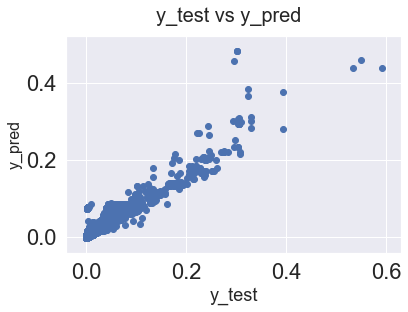

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [78]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8670521542267415

In [79]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

0.007263724898813372


In [80]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np
regr = LinearRegression()

In [81]:

scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

[0.91968423 0.91641936 0.9105315  0.91062498 0.91017456] 0.9134869260461468 0.0038704740074006466


-49779616253908.51

In [82]:
accuracy

-14454539693886.13

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [84]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
scores=cross_val_score(lm,X_train,y_train,scoring='r2',cv=folds)
scores

array([0.91976097, 0.90518065, 0.90453718, 0.92502717, 0.91894016])

In [85]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

In [86]:
from sklearn.feature_selection import RFE

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed: 16.0min finished


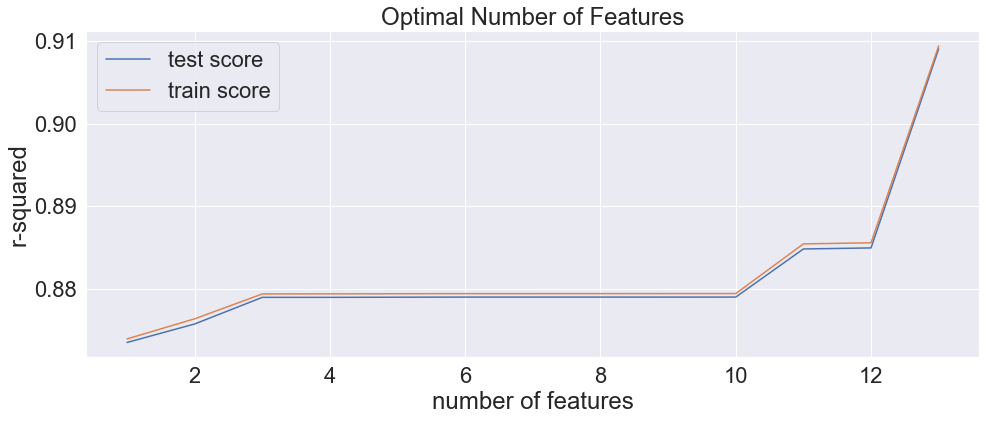

In [88]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


# In[594]:


# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


# In[595]:


# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [89]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [90]:
# model with optimal alpha
lm = Ridge(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.915130982208505
0.9083967584143545


In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9135021888620327
0.1


In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

In [ ]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))